<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/Heirarchical_Agglomerative_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering 

Dataset contains information about 200 registered customer of a shopping mall. Each row contains the annual income of one customer (in thousand USD) along with their spending score (1-100).

Goal: Apply Hierarchical Clustering to partition the customer into distinct clusters.

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/drive/My Drive/UC Machine Learning/Datasets/mall_customers.csv')

In [3]:
df.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Scaling the data:

In [4]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(df)
mall_data_scaled = std_scale.transform(df)
mall_data_scaled[:5,]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

Using Scipy we will first create dendrogram for this dataset.

In [0]:
from scipy.cluster.hierarchy import set_link_color_palette
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

set_link_color_palette(['black'])

In [0]:
link = linkage(mall_data_scaled, method='ward', metric='euclidean')

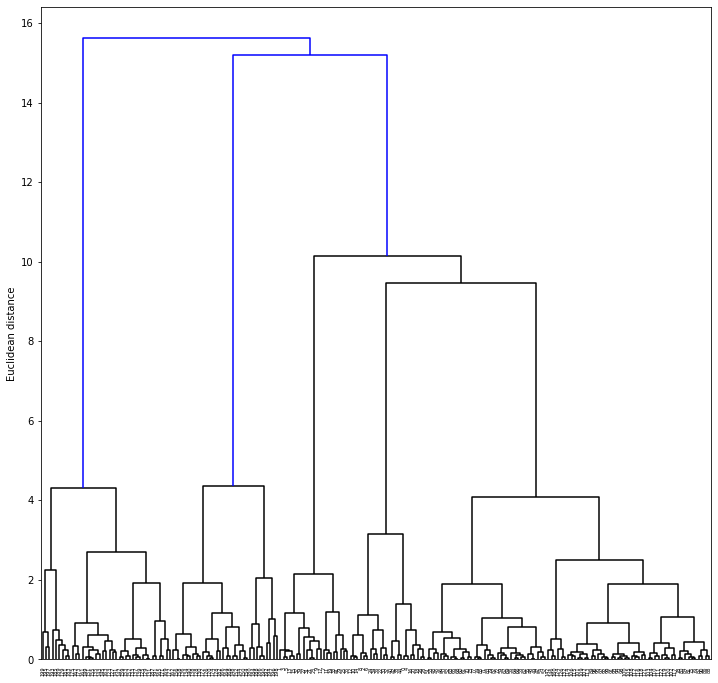

In [9]:
plt.figure(figsize=(12,12))
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
plt.show()

As a rule of thumb, we can cut the dendrogram where the gap between two successive combination similarities is largest. In the above dendogram, we can make this cut for 5 clusters.

Read more about how to find an optimal cut: https://nlp.stanford.edu/IR-book/html/htmledition/hierarchical-agglomerative-clustering-1.html

We can also verify if this number of cuts are numerically a good choice by calculating and compraing Silhouette score for different cluster values.

Next, we use Scikit-Learn to apply Agglomerative Clustering.

In [10]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)
#Fit the model to our scaled dataset.
model.fit(mall_data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

Check out the cluster predictions made by the model for our dataset.



In [11]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Next, we calculate the Silhouette score using Scikit-Learn's metrics class.

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(mall_data_scaled, model.labels_)

0.5538089226688662

Let's visualize the cluster output.



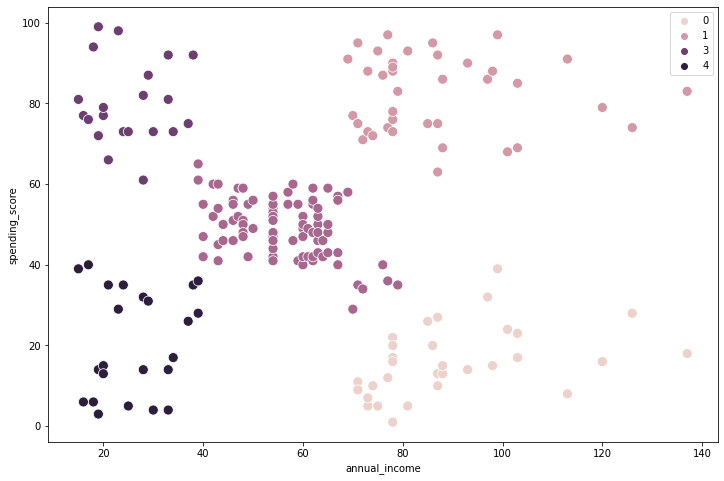

In [14]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='annual_income', y='spending_score', data=df, hue=model.labels_, s=100)
plt.show()

From the output we see that a customer falls into one of 5 clusters based on his/her annual income and spending score.